In [1]:
import pandas as pd

df = pd.read_csv('./../data/raw/realestate.csv')

In [2]:
import geopandas as gpd

# file from victorian government website 
gdf = gpd.read_file('./../data/raw/gda94_victoriagrid/esrishape/whole_of_dataset/victoria/VMADMIN/POSTCODE_POLYGON.shp')

In [3]:
gdf['postcode'] = gdf['POSTCODE'].astype(int)
gdf = gdf.drop('POSTCODE', axis=1)

df['postcode'] = df['postcode'].astype(int)

In [4]:
postcodeFreq = pd.DataFrame(df.groupby('postcode').size())

In [5]:
postcodeFreq['ListingCount'] = postcodeFreq[0]
postcodeFreq = postcodeFreq.drop(0, axis=1)

In [6]:
gdf = gdf.merge(postcodeFreq, on='postcode')

In [7]:
gdf.head()

,PFI,PFI_CR,UFI,UFI_CR,UFI_OLD,geometry,postcode,ListingCount
0,205410082,2005-09-27,468438225,2013-10-24,276949831,"POLYGON ((2516619.521 2407776.903, 2516647.746...",3131,25
1,205410234,2005-09-27,605058974,2021-02-23,576885034,"POLYGON ((2502460.400 2404045.989, 2502464.885...",3144,25
2,205409916,2005-09-27,559407772,2018-09-06,526596950,"POLYGON ((2482698.987 2414835.543, 2482698.016...",3023,100
3,205408458,2005-09-27,559407781,2018-09-06,553222661,"MULTIPOLYGON (((2451881.655 2403637.673, 24518...",3030,300
4,205409999,2005-09-27,468438318,2013-10-24,276949748,"POLYGON ((2508540.711 2395184.722, 2508429.465...",3167,24


In [8]:
import matplotlib.pyplot as plt

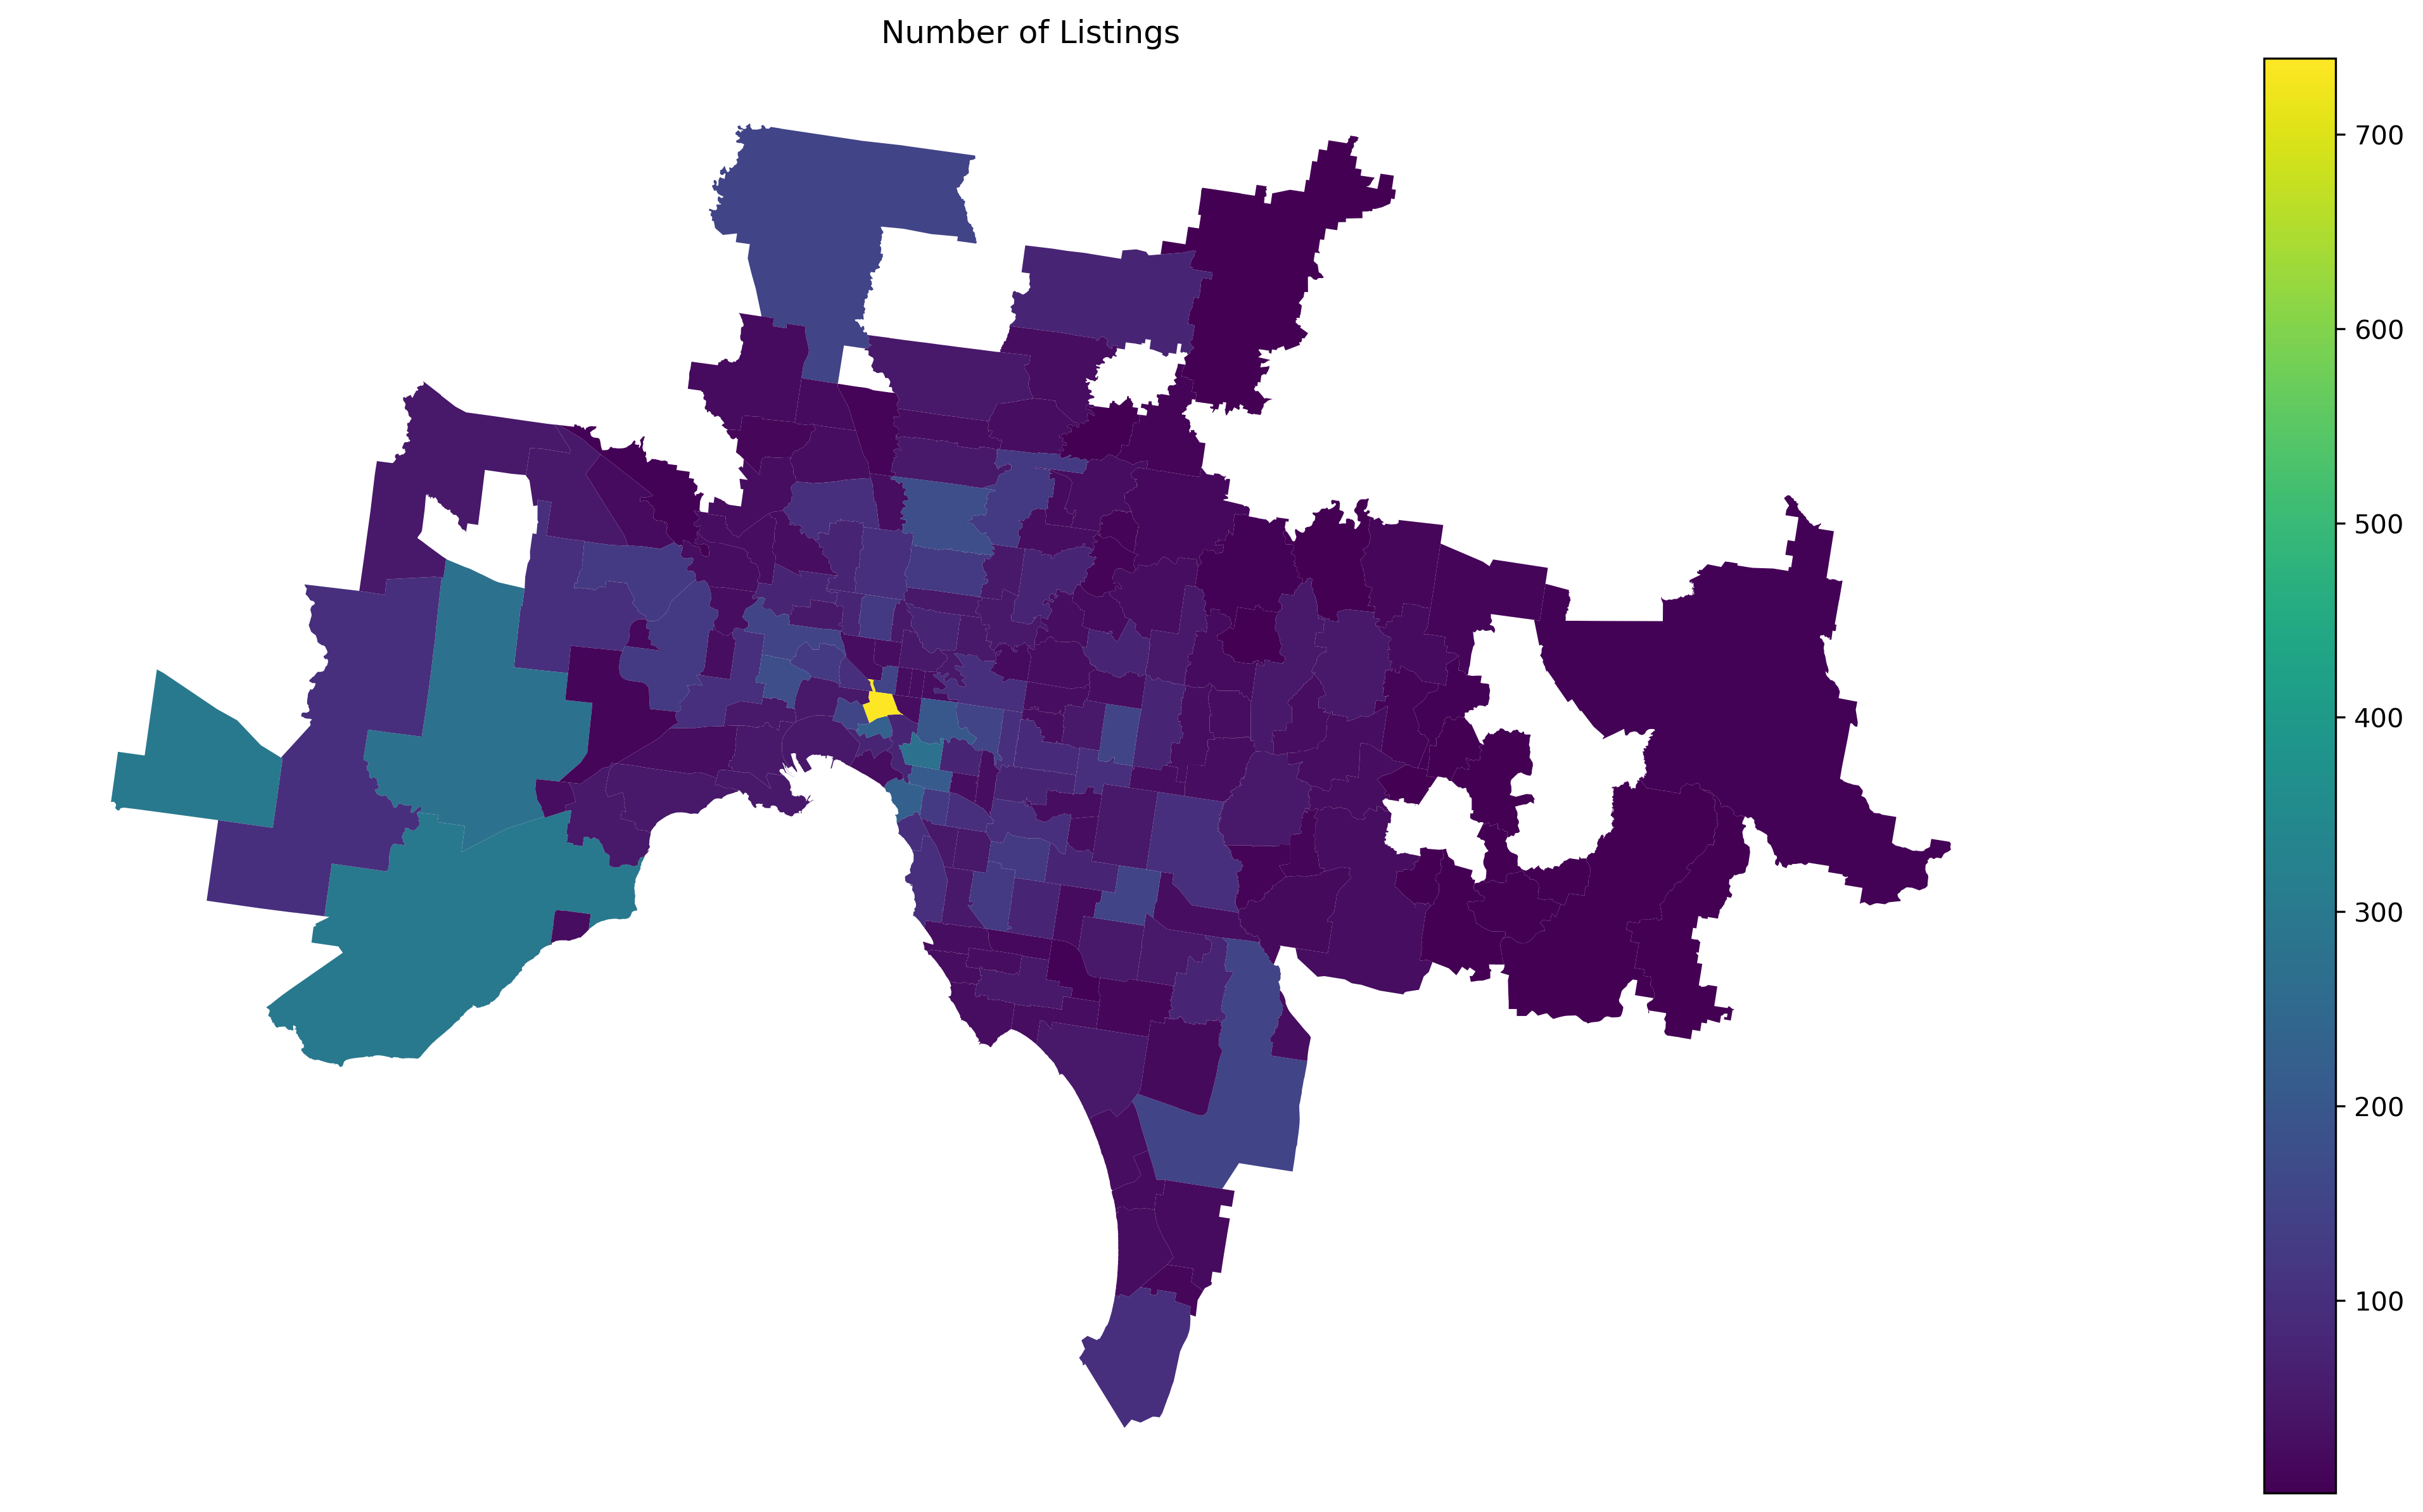

In [9]:
fig, ax = plt.subplots(figsize=(30, 10), dpi=300)
gdf.plot("ListingCount", legend=True, ax=ax)
plt.title('Number of Listings')
ax.set_axis_off()

In [10]:
plt.savefig('../plots/listing-count.png')

<Figure size 432x288 with 0 Axes>